In [50]:
# Nama : Zaki Mukhammad
# Asal : Lumajang, Jawa Timur
# Pekerjaan : Mahasiswa

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-12 12:40:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.63MB/s    in 66s     

2020-10-12 12:42:05 (4.67 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'scissors', 'paper']

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# Membagi folder paper, rock, dan scissors menjadi folder data train dan validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
total_train = len(train_paper_dir) + len(train_rock_dir) + len(train_scissors_dir)
total_validation = len(val_paper_dir) + len(val_rock_dir) + len(val_scissors_dir)
print('Total data train : ', total_train)
print('Total data validation : ', total_validation)

Total data train :  1312
Total data validation :  876


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='poisson',
              optimizer=tf.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks = [callbacks])

Epoch 1/20
25/25 - 15s - loss: 0.3461 - accuracy: 0.9909 - val_loss: 0.3593 - val_accuracy: 0.9812
Epoch 2/20
25/25 - 15s - loss: 0.3428 - accuracy: 0.9912 - val_loss: 0.3539 - val_accuracy: 0.9875
Epoch 3/20
25/25 - 15s - loss: 0.3397 - accuracy: 0.9950 - val_loss: 0.3877 - val_accuracy: 0.9688
Epoch 4/20
25/25 - 15s - loss: 0.3403 - accuracy: 0.9922 - val_loss: 0.3934 - val_accuracy: 0.9563
Epoch 5/20
25/25 - 15s - loss: 0.3417 - accuracy: 0.9912 - val_loss: 0.3763 - val_accuracy: 0.9625
Epoch 6/20
25/25 - 15s - loss: 0.3466 - accuracy: 0.9912 - val_loss: 0.3777 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 15s - loss: 0.3405 - accuracy: 0.9935 - val_loss: 0.3578 - val_accuracy: 0.9812
Epoch 8/20
25/25 - 15s - loss: 0.3461 - accuracy: 0.9935 - val_loss: 0.3713 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 15s - loss: 0.3477 - accuracy: 0.9896 - val_loss: 0.3632 - val_accuracy: 0.9812
Epoch 10/20
25/25 - 15s - loss: 0.3392 - accuracy: 0.9950 - val_loss: 0.3471 - val_accuracy: 0.9812
Epoch 11/

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

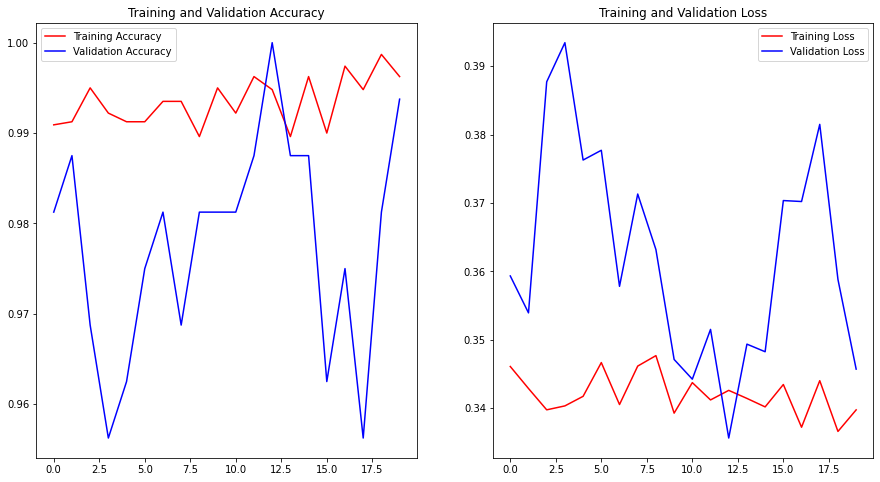

In [ ]:
#menampilkan plot accuracy & loss model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Saving wYsHIJDvNLDvn4m7.png to wYsHIJDvNLDvn4m7.png
wYsHIJDvNLDvn4m7.png
paper


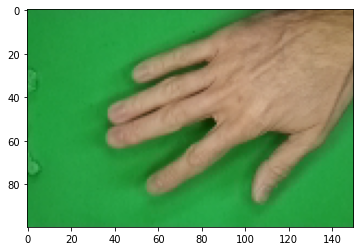

In [ ]:
#memprediksi gambar yang akan diunggah
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')